### Process 150 demonstrations from dat file to JSON

In [4]:
import os
import sys
import pickle

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [32]:
name_to_folder = {
    'Around' : 'SlideAroundDiscrete',
    'Closer' : 'SlideToward',
    'Next' : 'SlideNext',
    'Past' : 'SlidePast',
    'Away' : 'SlideAway',
}

json_structure = {}


for action in name_to_folder:
    json_structure[action] = []
    
    prefix = os.path.join( "..", "experiments", 
                          "human_evaluation_2d", 
                          name_to_folder[action])

    for index in range(30):
        one_demo = {}
        stored_config_file = os.path.join(prefix, str(index) + ".dat")
        with open(stored_config_file, 'rb') as fh:
            # need this encoding 
            stored_config = pickle.load(fh, encoding='latin-1')
    
        one_demo ['start_config']  = [list(cube.transform.position.flatten()) for cube in stored_config['start_config'] ]
        
        one_demo ['action_storage'] = []
        
        for _, _, next_transform, _, _, success, _, _ in stored_config['action_storage']:
            if success:
                t = list(next_transform.position.flatten())
                if len(one_demo ['action_storage']) == 0 or \
                        (len(one_demo ['action_storage']) > 0 and one_demo ['action_storage'][-1] != t):
                    one_demo ['action_storage'].append( t )
        
        json_structure[action].append(one_demo)

In [27]:
import json

In [33]:
with open('all_demos.json', 'w') as fh:
    json.dump(json_structure, fh)

In [35]:
import numpy as np
np.random.permutation(150)

array([121,  82,  91,  46,  21,   2,  94,  13,  78,  74,  64,  93,  76,
        49,  66, 113, 126, 132,   3, 100,  68,  20, 115,  99, 124, 102,
        83,  34, 109,  10,  25,  58,  96,  90, 144,  26,  32,  22,  24,
       131,  88,  97,  38,  31,  87, 134,  54,  17, 122,  40,  50,  61,
        42,  36, 123,  51,  56,  44,   4,   5,  15, 125, 106,  95, 143,
       147,  79, 139, 130,  60, 112, 116, 133,  35, 137,   8,  80,  84,
       105, 118,  62,  39,  85,  63, 117,  72,  14,  92,  71,  43, 140,
        67,  12,  69,  11, 110, 108, 145,  57, 114, 138, 127, 128,  65,
        52, 141,  81,  86,  53, 136,  75,  55,  47, 129, 120,  41,   0,
        73,   9, 104,  89,  28,   1,  16, 148,  29,  77, 149,  18, 111,
        59,  37, 101,  33, 119,  19,  23,  45, 107,   6,  30,  70, 142,
         7,  27, 135, 146,  98, 103,  48])

In [36]:
permutation = [121,  82,  91,  46,  21,   2,  94,  13,  78,  74,  64,  93,  76,
        49,  66, 113, 126, 132,   3, 100,  68,  20, 115,  99, 124, 102,
        83,  34, 109,  10,  25,  58,  96,  90, 144,  26,  32,  22,  24,
       131,  88,  97,  38,  31,  87, 134,  54,  17, 122,  40,  50,  61,
        42,  36, 123,  51,  56,  44,   4,   5,  15, 125, 106,  95, 143,
       147,  79, 139, 130,  60, 112, 116, 133,  35, 137,   8,  80,  84,
       105, 118,  62,  39,  85,  63, 117,  72,  14,  92,  71,  43, 140,
        67,  12,  69,  11, 110, 108, 145,  57, 114, 138, 127, 128,  65,
        52, 141,  81,  86,  53, 136,  75,  55,  47, 129, 120,  41,   0,
        73,   9, 104,  89,  28,   1,  16, 148,  29,  77, 149,  18, 111,
        59,  37, 101,  33, 119,  19,  23,  45, 107,   6,  30,  70, 142,
         7,  27, 135, 146,  98, 103,  48]

In [53]:
def oracle ( loop_index ):
    '''
    Return the correct label for a loop_index, which is a permutated from the true_index
    '''
    true_index = permutation[loop_index]
    
    t = true_index // 30
    
    return t

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
bitmap = np.zeros((6,5))

In [45]:
answer_code = ['Away', 'Closer', 'Past', 'Around', 'Next', 'None']
answer_map = dict((v, k) for k, v in enumerate(answer_code) )

In [51]:
answer_map

{'Around': 3, 'Away': 0, 'Closer': 1, 'Next': 4, 'None': 5, 'Past': 2}

In [54]:
import os
import glob

path = os.path.join('..', '3D scenes', 'answers', 'answers_*.txt')

for file_name in glob.glob(path):
    with open(file_name, 'r') as fh:
        data = json.load(fh)
        
        #print (data)
        
        for loop_index in range(150):
            true_y = oracle(loop_index) # from 0 to 4
            answer_y = answer_map[data[str(loop_index)]] # from 0 to 5
            
            bitmap[answer_y, true_y] += 1

In [55]:
bitmap

array([[ 68.,   0.,   8.,   0.,   0.],
       [  0.,  92.,   1.,   0.,  51.],
       [ 29.,   0.,  78.,   9.,   9.],
       [  0.,   1.,  17.,  94.,   4.],
       [  0.,  26.,   1.,   1.,  40.],
       [ 23.,   3.,  15.,  16.,  16.]])

NameError: name 'rs' is not defined

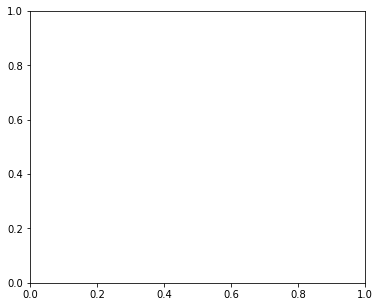

In [41]:
fig, ax = plt.subplots(figsize=(6,5))

ax.imshow(bitmap, cmap='hot_r', interpolation='nearest', 
          extent=[rs[0] - 0.1, rs[-1] + 0.1, rs[0] - 0.1, rs[-1] + 0.1])
# ax.set_xlim(rs[0], rs[-1])
# ax.set_xticks(rs)
# ax.set_ylim(rs[0], rs[-1])
# ax.set_yticks(rs)
plt.show()

In [64]:
import itertools
import numpy as np

def plot_confusion_matrix(cm, x_classes, y_classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    plt.xticks(np.arange(len(x_classes)), x_classes, rotation=45)
    plt.yticks(np.arange(len(y_classes)), y_classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Given label')

Normalized confusion matrix
[[ 0.56666667  0.          0.24166667  0.          0.          0.19166667]
 [ 0.          0.75409836  0.          0.00819672  0.21311475  0.02459016]
 [ 0.06666667  0.00833333  0.65        0.14166667  0.00833333  0.125     ]
 [ 0.          0.          0.075       0.78333333  0.00833333  0.13333333]
 [ 0.          0.425       0.075       0.03333333  0.33333333  0.13333333]]


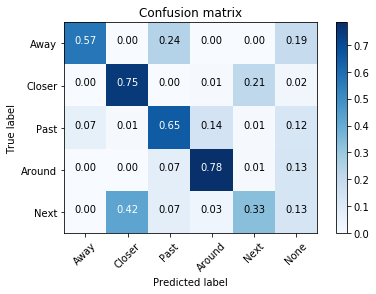

In [67]:
plot_confusion_matrix ( bitmap.T,
                       ['Away', 'Closer', 'Past', 'Around', 'Next', 'None'], 
                       ['Away', 'Closer', 'Past', 'Around', 'Next'], normalize = True)